In [2]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline 
# showign graph in notebook

In [10]:
housing = pd.read_csv('house_prices.csv')

In [10]:
housing.shape

(1460, 81)

In [11]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\USER\anaconda33\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea'>

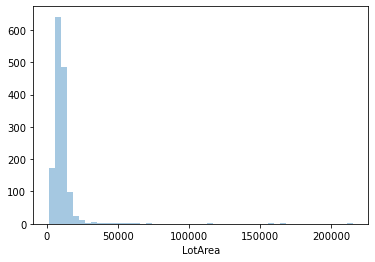

In [14]:
# Analyze the spread of the 'lotArea' column
sns.distplot(housing['LotArea'], kde=False)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

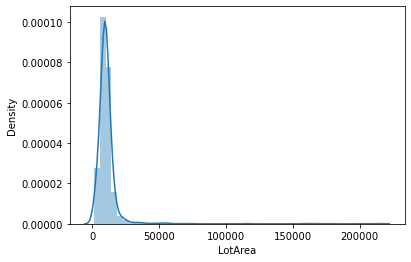

In [15]:
sns.distplot(housing['LotArea'], kde=True)

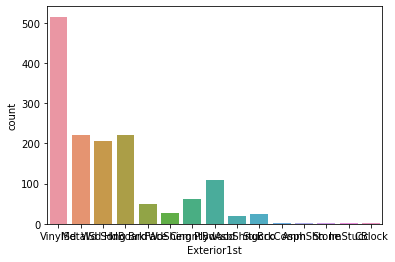

In [17]:
plot = sns.countplot(x='Exterior1st', data=housing)

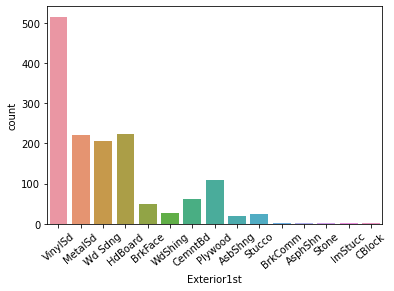

In [16]:
plot = sns.countplot(x='Exterior1st', data=housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

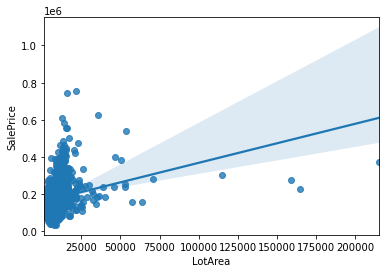

In [19]:
sns.regplot(x="LotArea", y = "SalePrice", data= housing)

In [25]:
# Are outliers hewing the relationship. Redraw the relationship after removing very large value
housing['LotArea'].quantile([0.5, 0.95, 0.99])



0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

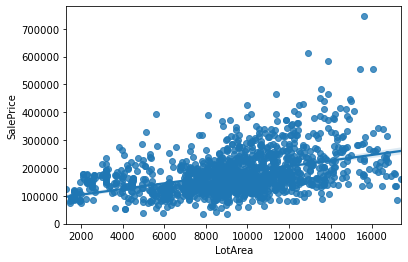

In [26]:
# Plot after Removeing highest and lowest values
housing_sub = housing.loc[housing['LotArea']< housing['LotArea'].quantile(0.95)]
sns.regplot(x="LotArea", y = "SalePrice", data= housing_sub)

# Plotting multiple graphs

# Q: Analyze the relationship between SalesPrice and all "Square Feet(SF)" related Columns



In [27]:
sf_cols =[col_name for col_name in housing.columns if "SF" in col_name]

In [29]:
len(sf_cols)
sf_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


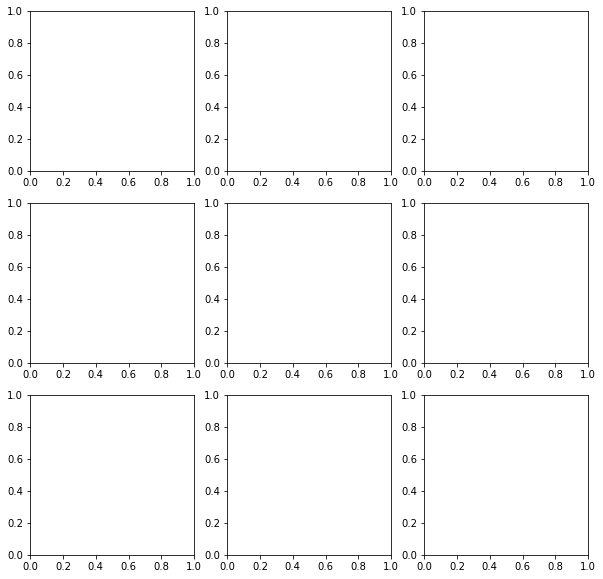

In [31]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(10,10))
for i in range(0, len(sf_cols)):
    rows = i//3
    cols = i%3
    print(rows, cols)

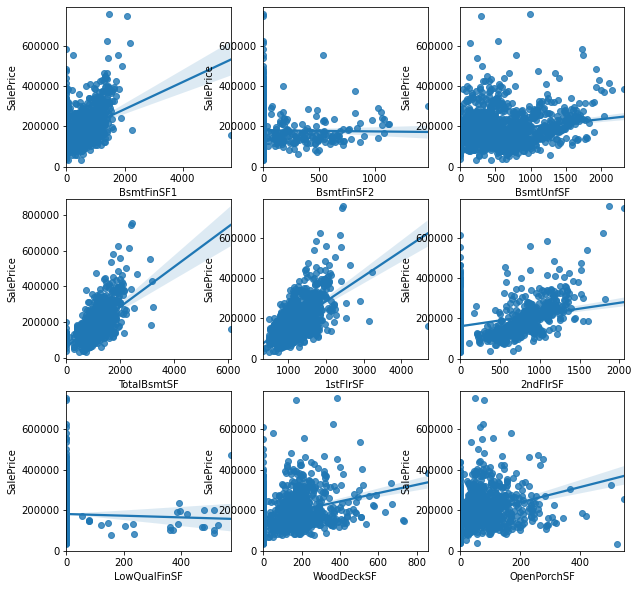

In [38]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(10,10))
for i in range(0, len(sf_cols)):
    rows = i//3
    cols = i%3
    ax = axs[rows, cols]
    plot = sns.regplot(x=sf_cols[i], y ='SalePrice', data = housing, ax=ax)

In [12]:
### Is the price of the house impacted by the Exterior covering on house
housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

ValueError: Could not interpret input 'Exterior1st'

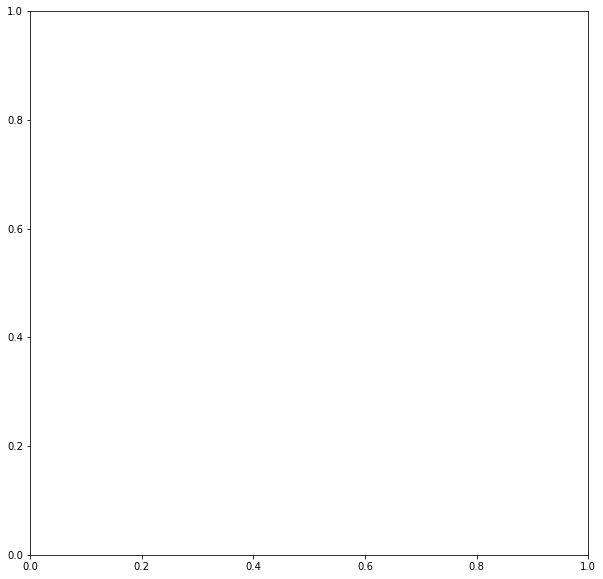

In [20]:
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(Data = housing, x ="Exterior1st", y = "SalePrice",  ax=axs);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);